In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
!mkdir data

In [0]:
!cp -a "/content/gdrive/My Drive/CARS.tar.gz" "data" 

In [38]:
!ls data

CARS.tar.gz


In [0]:
!tar -xvf data/CARS.tar.gz

In [44]:
!ls CARS

ALFA_ROMEO__145       FORD__RANGER		NISSAN__MARCH
ALFA_ROMEO__155       FORD__ROYALE		NISSAN__PATHFINDER
ALFA_ROMEO__164       FORD__TAURUS		NISSAN__PLATINA
AUDI__A1	      FORD__VERONA		NISSAN__SENTRA
AUDI__A3	      FORD__VERSAILLES		NISSAN__TIIDA
AUDI__A4	      GM__AGILE			NISSAN__VERSA
AUDI__A6	      GM__ASTRA			NISSAN__XTERRA
AUDI__TT	      GM__BLAZER		PEUGEOT__106
BMW__1xxi	      GM__C20			PEUGEOT__2008
BMW__3xxi	      GM__CAPTIVA		PEUGEOT__205
BMW__518i	      GM__CELTA			PEUGEOT__206
BMW__5xxi	      GM__CLASSIC		PEUGEOT__207
BMW__728i	      GM__COBALT		PEUGEOT__208
BMW__735i	      GM__CORSA_B		PEUGEOT__3008
BMW__740i	      GM__CORSA_C		PEUGEOT__306
BMW__750i	      GM__CRUZE			PEUGEOT__306_BREAK
BMW__830i	      GM__IPANEMA		PEUGEOT__306_SEDAN
BMW__840i	      GM__KADETT		PEUGEOT__307
BMW__850i	      GM__MERIVA		PEUGEOT__308
BMW__M3		      GM__MONTANA		PEUGEOT__405
BMW__M5		      GM__MONZA			PEUGEOT__406
BMW__X1		      GM__OMEGA			PEUGEOT__406_BREAK
BMW__X5		      GM__ONIX			PEUGEOT_

In [0]:
path = Path("CARS")

In [0]:
verify_images(path, recurse=True)

In [0]:
data = ImageDataBunch.from_folder(Path("CARS"), ds_tfms=get_transforms(max_zoom=1.03), size=299, bs=bs//2, valid_pct=0.2).normalize(imagenet_stats)

In [63]:
data.dl

<bound method DataBunch.dl of ImageDataBunch;

Train: LabelList (19459 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
CARS,CARS,CARS,CARS,CARS
Path: CARS;

Valid: LabelList (4864 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
VOLKSWAGEN__VOYAGE,BMW__M3,RENAULT__MASTER,HONDA__HR-V,VOLKSWAGEN__LOGUS
Path: CARS;

Test: None>

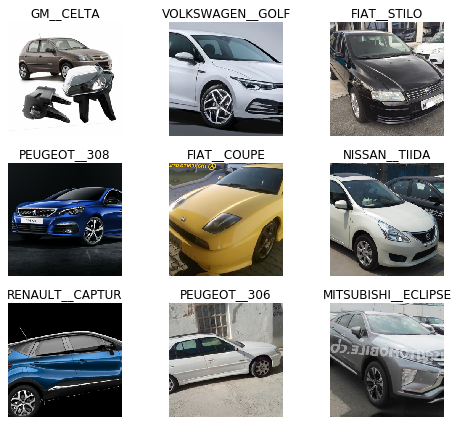

In [64]:
data.show_batch(rows=3, figsize=(7,6))

In [65]:
print(data.classes)
len(data.classes),data.c

['ALFA_ROMEO__145', 'ALFA_ROMEO__155', 'ALFA_ROMEO__164', 'AUDI__A1', 'AUDI__A3', 'AUDI__A4', 'AUDI__A6', 'AUDI__TT', 'BMW__1xxi', 'BMW__3xxi', 'BMW__518i', 'BMW__5xxi', 'BMW__728i', 'BMW__735i', 'BMW__740i', 'BMW__750i', 'BMW__830i', 'BMW__840i', 'BMW__850i', 'BMW__M3', 'BMW__M5', 'BMW__X1', 'BMW__X5', 'CARS', 'CHERY__TIGGO', 'CHRYSLER__CARAVAN', 'CHRYSLER__STRATUS', 'CITROEN__AIRCROSS', 'CITROEN__AX', 'CITROEN__BERLINGO', 'CITROEN__C15', 'CITROEN__C3', 'CITROEN__C4', 'CITROEN__C5', 'CITROEN__C8', 'CITROEN__DS3', 'CITROEN__DS4', 'CITROEN__DS5', 'CITROEN__EVASION', 'CITROEN__JUMPER', 'CITROEN__JUMPY', 'CITROEN__SAXO', 'CITROEN__XANTIA', 'CITROEN__XSARA', 'CITROEN__XSARA_BREAK', 'CITROEN__ZX', 'DODGE__DAKOTA', 'DODGE__JOURNEY', 'DODGE__RAM', 'FIAT__500', 'FIAT__BRAVA', 'FIAT__BRAVO', 'FIAT__COUPE', 'FIAT__DOBLO', 'FIAT__DUCATO', 'FIAT__ELBA', 'FIAT__FIORINO', 'FIAT__FREEMONT', 'FIAT__GRAND_SIENA', 'FIAT__IDEA', 'FIAT__LINEA', 'FIAT__MAREA', 'FIAT__MOBI', 'FIAT__PALIO', 'FIAT__PALIO_WEEK

(253, 253)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


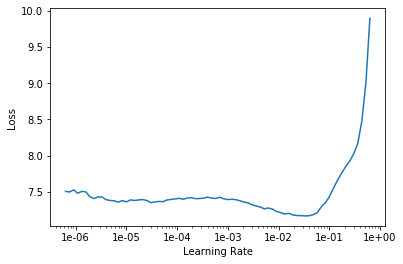

In [67]:
learn.lr_find()
learn.recorder.plot()

In [68]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,5.074129,4.082402,0.837993,0.162007,21:44
1,3.838103,3.093888,0.708059,0.291941,21:49
2,3.095340,2.430726,0.582442,0.417558,21:26
3,2.561119,2.033704,0.503495,0.496505,21:24
4,2.178702,1.806521,0.448602,0.551398,21:31
5,1.884317,1.642015,0.411595,0.588405,21:18
6,1.655978,1.577233,0.389597,0.610403,21:13
7,1.529568,1.564857,0.384663,0.615337,21:40


In [0]:
# learn.save('stage-1-50')
# learn.save('/content/gdrive/My Drive/stage-1-50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


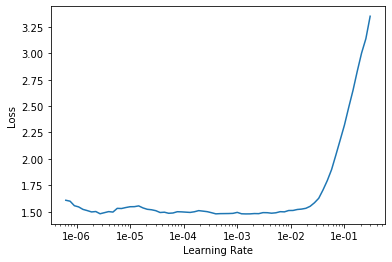

In [71]:
learn.lr_find()
learn.recorder.plot()

In [0]:
verify_images(path, recurse=False)

In [0]:
data = ImageDataBunch.from_folder(Path("CARS"), ds_tfms=get_transforms(max_zoom=1.01), size=255, bs=bs//2, valid_pct=0.2).normalize(imagenet_stats)

In [94]:
data.dl

<bound method DataBunch.dl of ImageDataBunch;

Train: LabelList (18664 items)
x: ImageList
Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255)
y: CategoryList
CHRYSLER__STRATUS,CHRYSLER__STRATUS,CHRYSLER__STRATUS,CHRYSLER__STRATUS,CHRYSLER__STRATUS
Path: CARS;

Valid: LabelList (4666 items)
x: ImageList
Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255)
y: CategoryList
CHERY__TIGGO,PEUGEOT__207,BMW__740i,JEEP__RENEGADE,CITROEN__DS3
Path: CARS;

Test: None>

In [95]:
print(data.classes)
len(data.classes),data.c

['ALFA_ROMEO__145', 'ALFA_ROMEO__155', 'ALFA_ROMEO__164', 'AUDI__A1', 'AUDI__A3', 'AUDI__A4', 'AUDI__A6', 'AUDI__TT', 'BMW__1xxi', 'BMW__3xxi', 'BMW__518i', 'BMW__5xxi', 'BMW__728i', 'BMW__735i', 'BMW__740i', 'BMW__750i', 'BMW__830i', 'BMW__840i', 'BMW__850i', 'BMW__M3', 'BMW__M5', 'BMW__X1', 'BMW__X5', 'CHERY__TIGGO', 'CHRYSLER__CARAVAN', 'CHRYSLER__STRATUS', 'CITROEN__AIRCROSS', 'CITROEN__AX', 'CITROEN__BERLINGO', 'CITROEN__C15', 'CITROEN__C3', 'CITROEN__C4', 'CITROEN__C5', 'CITROEN__C8', 'CITROEN__DS3', 'CITROEN__DS4', 'CITROEN__DS5', 'CITROEN__EVASION', 'CITROEN__JUMPER', 'CITROEN__JUMPY', 'CITROEN__SAXO', 'CITROEN__XANTIA', 'CITROEN__XSARA', 'CITROEN__XSARA_BREAK', 'CITROEN__ZX', 'DODGE__DAKOTA', 'DODGE__JOURNEY', 'DODGE__RAM', 'FIAT__500', 'FIAT__BRAVA', 'FIAT__BRAVO', 'FIAT__COUPE', 'FIAT__DOBLO', 'FIAT__DUCATO', 'FIAT__ELBA', 'FIAT__FIORINO', 'FIAT__FREEMONT', 'FIAT__GRAND_SIENA', 'FIAT__IDEA', 'FIAT__LINEA', 'FIAT__MAREA', 'FIAT__MOBI', 'FIAT__PALIO', 'FIAT__PALIO_WEEKEND', 'F

(252, 252)

In [0]:
learn.data = data

In [97]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.851041,2.119411,0.513288,0.486712,18:02
1,2.195477,1.729252,0.417274,0.582726,17:44


In [0]:
learn.save('stage-2-50')
learn.save('/content/gdrive/My Drive/stage-2-50')

In [0]:
data = ImageDataBunch.from_folder(Path("CARS"), ds_tfms=get_transforms(max_zoom=1.03), size=299, bs=bs//2, valid_pct=0.2).normalize(imagenet_stats)

In [103]:
data.dl

<bound method DataBunch.dl of ImageDataBunch;

Train: LabelList (18664 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
CHRYSLER__STRATUS,CHRYSLER__STRATUS,CHRYSLER__STRATUS,CHRYSLER__STRATUS,CHRYSLER__STRATUS
Path: CARS;

Valid: LabelList (4666 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
FORD__EXPLORER,PEUGEOT__408,MITSUBISHI__ECLIPSE,FORD__FIESTA,VOLKSWAGEN__POLO_CLASSIC
Path: CARS;

Test: None>

In [0]:
learn.data = data

In [105]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.096344,1.344809,0.327904,0.672096,20:43
1,1.981079,1.249844,0.316974,0.683026,20:51
2,1.639973,1.124943,0.284398,0.715602,21:01
3,1.308163,1.083400,0.276682,0.723318,20:40


In [0]:
# learn.save('stage-3-50')
# learn.save('/content/gdrive/My Drive/stage-3-50')

In [107]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.566441,1.160433,0.298543,0.701457,20:52
1,1.657607,1.183414,0.299400,0.700600,20:52
2,1.369274,1.054644,0.268110,0.731890,20:44
3,1.173865,1.020813,0.262538,0.737463,20:33


In [0]:
# learn.save('stage-4-50')
# learn.save('/content/gdrive/My Drive/stage-4-50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


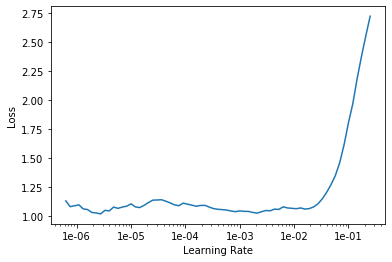

In [112]:
learn.lr_find()
learn.recorder.plot()

In [113]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.073468,0.995350,0.255036,0.744964,21:54
1,1.023886,0.937835,0.241535,0.758465,21:51
2,0.958776,0.926214,0.239391,0.760609,21:46


In [0]:
# learn.save('stage-f-50')
# learn.save('/content/gdrive/My Drive/stage-f-50')

In [73]:
learn.load('/content/gdrive/My Drive/stage-f-50')

Learner(data=ImageDataBunch;

Train: LabelList (19459 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
CHERY__TIGGO,CHERY__TIGGO,CHERY__TIGGO,CHERY__TIGGO,CHERY__TIGGO
Path: CARS;

Valid: LabelList (4864 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
MITSUBISHI__PAJERO_DAKAR,PEUGEOT__3008,BMW__3xxi,PEUGEOT__807,FORD__F250
Path: CARS;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

In [0]:
learn.export()

In [0]:
!cp "CARS/export.pkl" "/content/gdrive/My Drive/"

In [116]:
interp.most_confused(min_val=2)

[('BMW__5xxi', 'BMW__3xxi', 10),
 ('GM__CORSA_C', 'GM__CORSA_B', 9),
 ('MITSUBISHI__PAJERO', 'MITSUBISHI__PAJERO_SPORT', 9),
 ('FIAT__ELBA', 'FIAT__PREMIO', 8),
 ('GM__ONIX', 'GM__PRISMA', 8),
 ('VOLKSWAGEN__GOL', 'VOLKSWAGEN__VOYAGE', 8),
 ('BMW__1xxi', 'BMW__3xxi', 7),
 ('GM__CORSA_B', 'GM__CORSA_C', 7),
 ('BMW__830i', 'BMW__850i', 6),
 ('PEUGEOT__406', 'PEUGEOT__406_BREAK', 6),
 ('PEUGEOT__406_BREAK', 'PEUGEOT__406', 6),
 ('PEUGEOT__806', 'CITROEN__EVASION', 6),
 ('VOLKSWAGEN__FOX', 'VOLKSWAGEN__SPACEFOX', 6),
 ('BMW__518i', 'BMW__5xxi', 5),
 ('CITROEN__BERLINGO', 'PEUGEOT__PARTNER', 5),
 ('FIAT__PALIO', 'FIAT__PALIO_WEEKEND', 5),
 ('GM__CORSA_C', 'GM__CLASSIC', 5),
 ('AUDI__A3', 'AUDI__A4', 4),
 ('AUDI__A6', 'AUDI__A4', 4),
 ('BMW__728i', 'BMW__735i', 4),
 ('BMW__740i', 'BMW__3xxi', 4),
 ('BMW__740i', 'BMW__728i', 4),
 ('BMW__850i', 'BMW__840i', 4),
 ('BMW__M3', 'BMW__3xxi', 4),
 ('FIAT__BRAVA', 'FIAT__MAREA', 4),
 ('FIAT__DUCATO', 'CITROEN__JUMPER', 4),
 ('FIAT__DUCATO', 'PEUGEOT_

In [0]:
interp.plot_confusion_matrix(figsize=(100,100))

In [0]:
predict_learner = load_learner("CARS")

In [43]:
!wget "https://img.volanty.com/thumb/inspecao/6364709670354944/20181103/6364709670354944_1541246486176.jpg"

--2019-10-26 05:02:16--  https://img.volanty.com/thumb/inspecao/6364709670354944/20181103/6364709670354944_1541246486176.jpg
Resolving img.volanty.com (img.volanty.com)... 13.226.42.91, 13.226.42.50, 13.226.42.128, ...
Connecting to img.volanty.com (img.volanty.com)|13.226.42.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37094 (36K) [image/jpeg]
Saving to: ‘6364709670354944_1541246486176.jpg’

6364709670354944_15 100%[===================>]  36.22K  --.-KB/s    in 0.04s   

2019-10-26 05:02:16 (834 KB/s) - ‘6364709670354944_1541246486176.jpg’ saved [37094/37094]



In [0]:
img = open_image("6364709670354944_1541246486176.jpg")

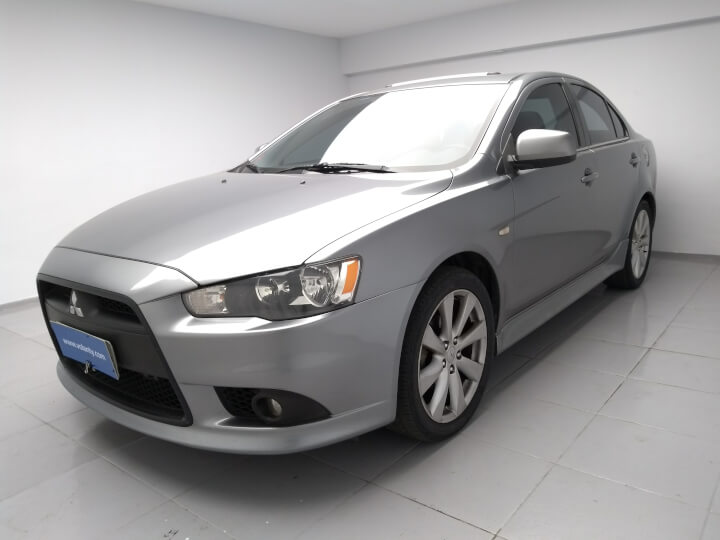

In [45]:
img

In [0]:
pred_class, pred_idx, outputs = predict_learner.predict(img)

In [71]:
pred_class

Category MITSUBISHI__LANCER